# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business task of understanding what drives used car prices can be reframed as a **supervised machine learning regression problem**. The target variable is the **price of the car**, while explanatory variables include structured attributes such as **make, model, year, type, transmission, and location**.

The objective is twofold:

1. **Prediction** – build and evaluate models that can accurately estimate the price of a car based on its features.  
2. **Interpretability** – assess the influence of each predictor and explain how these factors influence used car prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Steps to get to know the dataset and identify quality issues:

1. **Load the data**: Read the dataset into a pandas DataFrame for analysis.
2. **Inspect the structure**:  `.info()`, `.shape`, `.head()`, `.tail()` and `.describe()` to understand the number of rows, columns, and data types.
3. **Check for missing values**: Calculate the number and percentage of missing values in each column to identify incomplete data.
4. **Assess duplicates**: Check for duplicate rows that may skew analysis.
5. **Review value distributions**: `.value_counts()` to spot outliers, unexpected values, or low cardinality columns.
6. **Visualize missing data**: Plot missing value percentages to quickly identify problematic columns.
7. **Examine categorical and numerical features**: Review unique values and ranges to spot inconsistencies or errors.
8. **Check for inconsistent formats**: Look for mixed data types or formatting issues in columns (e.g., dates, categories).
9. **Data Quality**: Columns with significant missing data, outliers, or other quality concerns for further cleaning and preparation.

#### 1. Load the data

Read the dataset into a pandas DataFrame for analysis.

In [188]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# 1. Load the data
data = pd.read_csv('data/vehicles.csv')
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


#### 2. Inspect the structure

Use `.info()`, `.shape`, `.head()`, `.tail()`, `.describe()` to understand the number of rows, columns, and data types.

In [ ]:
# 2. Inspect the structure - Info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [84]:
# 2. Inspect the structure - Shape
print("Shape of the dataset:", data.shape)

Shape of the dataset: (426880, 18)


In [ ]:
# 3. Inspect the structure - head and tail
print("First 5 rows of the dataset:")
print(data.head())
print("Last 5 rows of the dataset:")
print(data.tail())

First 5 rows of the dataset:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  Na

In [92]:
# 4. Summary statistics
data.describe(include='all')

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
count,4.268800e+05,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,423867,4.224800e+05,418638,424324,265838,296313,120519,334022,296677,426880
unique,NaN,404,NaN,NaN,42,29649,6,8,5,NaN,6,3,118246,3,4,13,12,51
top,NaN,columbus,NaN,NaN,ford,f-150,good,6 cylinders,gas,NaN,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,NaN,3608,NaN,NaN,70985,8009,121456,94169,356209,NaN,405117,336524,261,131904,63465,87056,79285,50614
mean,7.311487e+09,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,NaN,9.804333e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.473170e+06,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,NaN,2.138815e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.207408e+09,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.308143e+09,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,NaN,3.770400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.312621e+09,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,NaN,8.554800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.315254e+09,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,NaN,1.335425e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Check for missing values

Calculate the number and percentage of missing values in each column to identify incomplete data.

In [95]:
# 3. Check for missing values
missing_data_counts = data.isnull().sum()
missing_data_percent = data.isnull().mean() * 100
print('Missing values per column:')
print(missing_data_counts)
print('Percentage of missing values per column:')
print(missing_data_percent)

Missing values per column:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
Percentage of missing values per column:
id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


#### 4. Assess duplicates

Check for duplicate rows that may skew analysis.

In [87]:
# 4. Assess duplicates
duplicate_count = data.duplicated().sum()
print(f'Duplicate rows: {duplicate_count}')

Duplicate rows: 0


#### 5. Review value distributions

Use `.value_counts()` to spot outliers, unexpected values, or low cardinality columns.

In [93]:
# 5. Review value distributions
for col in data.columns:
    print(f'Value counts for {col}:')
    print(data[col].value_counts(dropna=False))
    print('-' * 40)

Value counts for id:
id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: count, Length: 426880, dtype: int64
----------------------------------------
Value counts for region:
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
----------------------------------------
Value counts for price:
price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: count, Length: 15655, dtype: int64
-----------------

#### 6. Visualize missing data

Plot missing value percentages to quickly identify problematic columns.

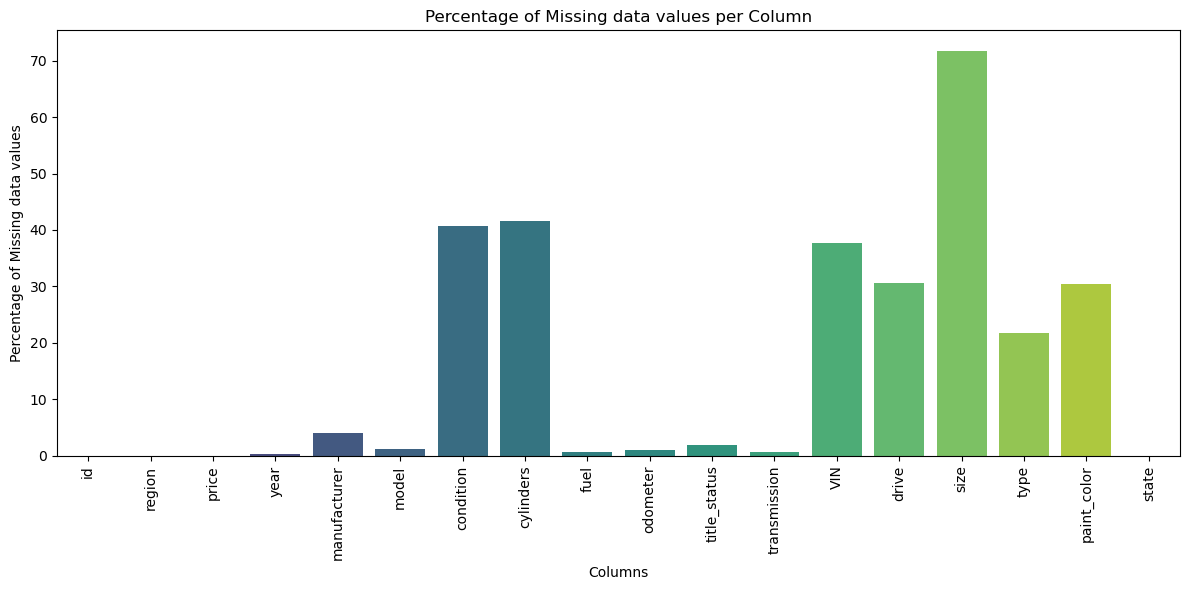

In [98]:
plt.figure(figsize=(12,6))
sns.barplot(x=missing_data_percent.index, y=missing_data_percent.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing data values')
plt.xlabel('Columns')
plt.title('Percentage of Missing data values per Column')
plt.tight_layout()
plt.show()

#### 7. Examine categorical and numerical features

Review unique values and ranges to spot inconsistencies or errors.

In [99]:
# 7. Examine categorical and numerical features
for col in data.select_dtypes(include=['object']).columns:
    print(f'Unique values in {col}:')
    print(data[col].unique())
    print('-' * 40)
for col in data.select_dtypes(include=['number']).columns:
    print(f'Range for {col}: min={data[col].min()}, max={data[col].max()}')
    print('-' * 40)

Unique values in region:
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 

### 8. Check for inconsistent formats
Look for mixed data types or formatting issues in columns (e.g., dates, categories).

In [190]:
# Analyze format patterns for object columns
for col in data.select_dtypes(include=['object']).columns:
    # Group by value pattern and count occurrences (including NaN)
    value_patterns = data[col].apply(lambda x: str(type(x).__name__))
    pattern_counts = value_patterns.value_counts(dropna=False)
    
    print(f'\nFormat analysis for {col}:')
    print('Data type distribution (including NaN):')
    print(pattern_counts)
    print('-' * 40)
    
    # # Show top 5 most frequent values first
    # print('Top 5 most frequent values:')
    # print(data[col].value_counts(dropna=False).head())
    # print('=' * 60)


Format analysis for region:
Data type distribution (including NaN):
region
str    426880
Name: count, dtype: int64
----------------------------------------

Format analysis for manufacturer:
Data type distribution (including NaN):
manufacturer
str      409234
float     17646
Name: count, dtype: int64
----------------------------------------

Format analysis for model:
Data type distribution (including NaN):
model
str      421603
float      5277
Name: count, dtype: int64
----------------------------------------

Format analysis for condition:
Data type distribution (including NaN):
condition
str      252776
float    174104
Name: count, dtype: int64
----------------------------------------

Format analysis for cylinders:
Data type distribution (including NaN):
cylinders
str      249202
float    177678
Name: count, dtype: int64
----------------------------------------

Format analysis for fuel:
Data type distribution (including NaN):
fuel
str      423867
float      3013
Name: count, dtyp

### 8. Data Quality
Look for mixed data types or formatting issues in columns (e.g., dates, categories).

In [112]:
# 9. Data Quality
problematic_columns = missing_data_percent[missing_data_percent > 50].index.tolist()
print('Columns with >50% missing data:', problematic_columns)

Columns with >50% missing data: ['size']


In [110]:
detailed_summary = {
    'Dataset Statistics': {
        'Total Records': len(data),
        'Total Features': len(data.columns),
        'Numeric Features': len(data.select_dtypes(include=['int64', 'float64']).columns),
        'Categorical Features': len(data.select_dtypes(include=['object']).columns)
    },
    'Missing Data': {
        'Columns >50% Missing': missing_data_percent[missing_data_percent > 50].index.tolist(),
        'Columns >20% Missing': missing_data_percent[missing_data_percent > 20].index.tolist()
    },
    'Categorical Columns': {
        col: data[col].nunique() for col in data.select_dtypes(include=['object']).columns
    },
    'Numerical Ranges': {
        col: {'min': data[col].min(), 'max': data[col].max()} 
        for col in data.select_dtypes(include=['int64', 'float64']).columns
    }
}

# Print detailed summary
for category, stats in detailed_summary.items():
    print(f"\n{category}:")
    print("-" * 40)
    if isinstance(stats, dict):
        for key, value in stats.items():
            print(f"{key}: {value}")


Dataset Statistics:
----------------------------------------
Total Records: 426880
Total Features: 18
Numeric Features: 4
Categorical Features: 14

Missing Data:
----------------------------------------
Columns >50% Missing: ['size']
Columns >20% Missing: ['condition', 'cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color']

Categorical Columns:
----------------------------------------
region: 404
manufacturer: 42
model: 29649
condition: 6
cylinders: 8
fuel: 5
title_status: 6
transmission: 3
VIN: 118246
drive: 3
size: 4
type: 13
paint_color: 12
state: 51

Numerical Ranges:
----------------------------------------
id: {'min': 7207408119, 'max': 7317101084}
price: {'min': 0, 'max': 3736928711}
year: {'min': 1900.0, 'max': 2022.0}
odometer: {'min': 0.0, 'max': 10000000.0}


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
#Not required
# data['manufacturer'] = data['manufacturer'].astype(str)
# data['model'] = data['model'].astype(str)

In [162]:
# Drop the records with price = 0
data_clean = data[data["price"]!=0]
data_clean.shape

(393985, 18)

In [163]:
# Drop the uniqueid columns - id, VIN
data_clean = data_clean.drop({'id','VIN'}, axis=1)
data_clean.shape

(393985, 16)

In [164]:
# Drop the region column as there is state
data_clean = data_clean.drop({'region'}, axis =1)
data_clean.shape

(393985, 15)

In [165]:
# Drop the model column as it has junk data
data_clean = data_clean.drop({'model'}, axis =1)
data_clean.shape

(393985, 14)

In [166]:
data_clean = data_clean.dropna(subset=['manufacturer', 'year'], how='all')
data_clean.shape

(392816, 14)

In [150]:
data_clean.isna().mean() * 100

price            0.000000
year             0.001018
manufacturer     3.822655
condition       38.241823
cylinders       40.818348
fuel             0.594426
odometer         0.566932
title_status     1.891471
transmission     0.000000
drive           30.541526
size            71.729257
type            21.831595
paint_color     29.787738
state            0.000000
dtype: float64

In [167]:
# Fill the missing values in strong categorical columns with mode.
data_clean["transmission"] = data_clean["transmission"].fillna(data_clean["transmission"].mode()[0])
data_clean["fuel"] = data_clean["fuel"].fillna(data_clean["fuel"].mode()[0])
data_clean["title_status"] = data_clean["title_status"].fillna(data_clean["title_status"].mode()[0])

In [168]:
# Fill the missing values with "Unknown" category
#data_clean['manufacturer'] = data_clean['manufacturer'].fillna('unknown')
data_clean['condition'] = data_clean['condition'].fillna('unknown')
data_clean['paint_color'] = data_clean['paint_color'].fillna('unknown')
data_clean['type'] = data_clean['type'].fillna('unknown')
data_clean['size'] = data_clean['size'].fillna('unknown')
data_clean['drive'] = data_clean['drive'].fillna('unknown')
data_clean['cylinders'] = data_clean['cylinders'].fillna('unknown')
data_clean.isna().mean() * 100

price           0.000000
year            0.001018
manufacturer    3.822655
condition       0.000000
cylinders       0.000000
fuel            0.000000
odometer        0.566932
title_status    0.000000
transmission    0.000000
drive           0.000000
size            0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64

In [169]:
data_clean.dropna(inplace=True)

In [170]:
data_clean.isna().mean() * 100

price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
size            0.0
type            0.0
paint_color     0.0
state           0.0
dtype: float64

In [171]:
data_clean.count()

price           375619
year            375619
manufacturer    375619
condition       375619
cylinders       375619
fuel            375619
odometer        375619
title_status    375619
transmission    375619
drive           375619
size            375619
type            375619
paint_color     375619
state           375619
dtype: int64

In [185]:
data_clean['year'] = data_clean['year'].astype(int)
data_clean['odometer'] = data_clean['odometer'].astype(int) 

In [173]:
data_clean['year'].isna().sum()

0

In [183]:
# Analyze format patterns for object columns
for col in data_clean.select_dtypes(include=['object']).columns:
    # Group by value pattern and count occurrences (including NaN)
    value_patterns = data_clean[col].apply(lambda x: str(type(x).__name__))
    pattern_counts = value_patterns.value_counts(dropna=False)
    
    print(f'\nFormat analysis for {col}:')
    print('Data type distribution (including NaN):')
    print(pattern_counts)
    print('-' * 40)
    


Format analysis for manufacturer:
Data type distribution (including NaN):
manufacturer
str    375619
Name: count, dtype: int64
----------------------------------------

Format analysis for condition:
Data type distribution (including NaN):
condition
str    375619
Name: count, dtype: int64
----------------------------------------

Format analysis for cylinders:
Data type distribution (including NaN):
cylinders
str    375619
Name: count, dtype: int64
----------------------------------------

Format analysis for fuel:
Data type distribution (including NaN):
fuel
str    375619
Name: count, dtype: int64
----------------------------------------

Format analysis for title_status:
Data type distribution (including NaN):
title_status
str    375619
Name: count, dtype: int64
----------------------------------------

Format analysis for transmission:
Data type distribution (including NaN):
transmission
str    375619
Name: count, dtype: int64
----------------------------------------

Format analys

In [ ]:
def analyze_price_outliers():
    # Calculate IQR for price
    Q1 = data_clean['price'].quantile(0.25)
    Q3 = data_clean['price'].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = data_clean[(data_clean['price'] < lower_bound) | 
                         (data_clean['price'] > upper_bound)]
    
    print("Price Distribution Analysis:")
    print(f"Median Price: ${data_clean['price'].median():,.2f}")
    print(f"Mean Price: ${data_clean['price'].mean():,.2f}")
    print(f"Q1 Price: ${Q1:,.2f}")
    print(f"Q3 Price: ${Q3:,.2f}")
    print(f"\nOutlier Boundaries:")
    print(f"Lower bound: ${lower_bound:,.2f}")
    print(f"Upper bound: ${upper_bound:,.2f}")
    print(f"\nNumber of outliers: {len(outliers)}")
    print(f"Percentage of outliers: {(len(outliers)/len(data_clean))*100:.2f}%")
    
    return outliers

# Analyze price outliers
price_outliers = analyze_price_outliers()

Price Distribution Analysis:
Median Price: $15,495.00
Mean Price: $83,781.42
Q1 Price: $7,300.00
Q3 Price: $27,590.00

Outlier Boundaries:
Lower bound: $-23,135.00
Upper bound: $58,025.00

Number of outliers: 0
Percentage of outliers: 0.00%


KeyboardInterrupt: 

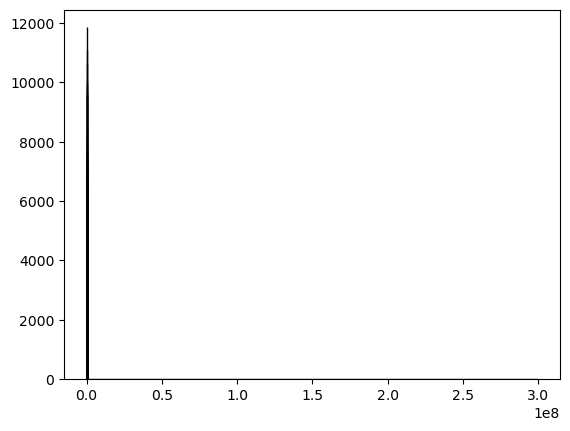

In [199]:
# Visualization to review price distributions without outliers
sns.histplot(
    data_clean['price'],
    kde=True
).set(title = "Price Distribution without outliers")

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.